In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

sns.set()

In [3]:
raw_data = pd.read_csv("../../../data/1.04. Real-life example.csv")
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


データに問題がないか見つける方法として記述統計量を使ってみる

In [35]:
# デフォルトで量的変数のみを表示
raw_data.describe(include="all")

# 観測されたデータの数が異なるため、欠損値があることがわかる
# カテゴリ変数にユニークな値が312個あることを確認→ダミー変数を312個作成する必要がある
# 登録者数などのほとんどがYesとなる、つまり余計なデータがあることがわかる
# モデルも他の情報から読み取れるので、削除する

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data = raw_data.drop(["Model"], axis=1)
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


欠損しているデータ数がいくつかを確認

In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

一般的に欠損値の割合が5％未満であれば、その変数は削除しても問題ないとされている

In [10]:
data_no_mv = data.dropna(axis=0)

削除する

In [11]:
data_no_mv.describe(include="all")

# Max値は外れ値の可能性があるので、外れ値を除外する
# 上位1%のデータを除外するといい感じになる

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_89231/216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

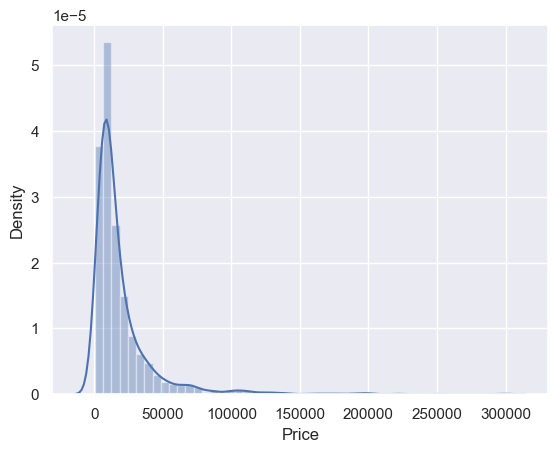

In [37]:
sns.distplot(data_no_mv["Price"])

外れ値を除外するため、上位1％のデータを除外する

In [17]:
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"] < q]
data_1.describe(include="all")

# まだ許容できる範囲なので一旦OK

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_89231/2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

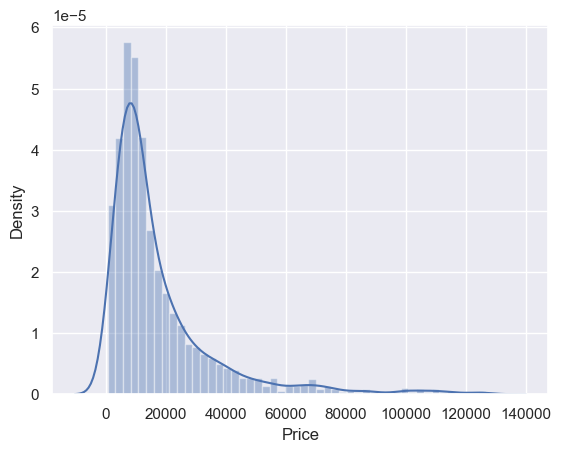

In [38]:
sns.distplot(data_1["Price"])

In [39]:
q = data_1["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"] < q]

/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_89231/1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

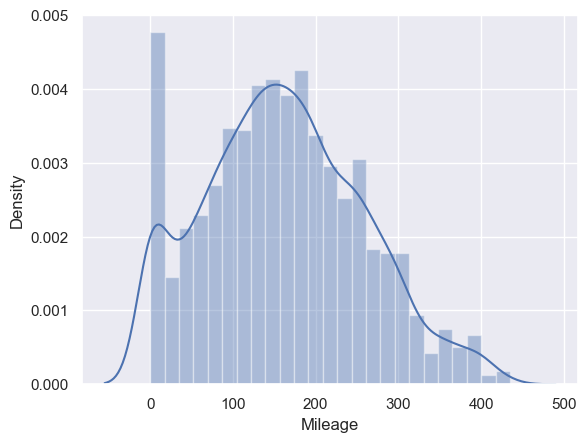

In [40]:
sns.distplot(data_2["Mileage"])

/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_89231/1792518409.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

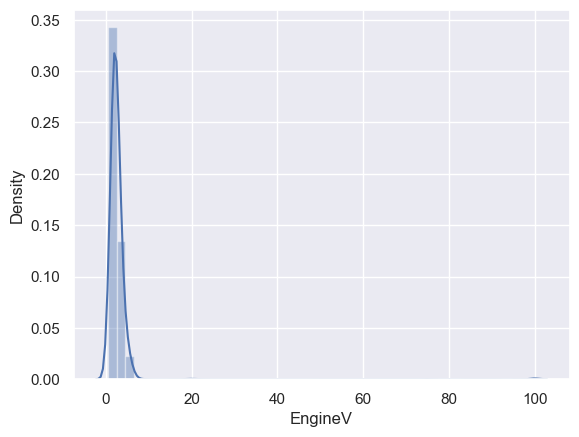

In [41]:
sns.distplot(data_2["EngineV"])

# おかしな値があることがわかる
# これは欠けているデータにラベル付けする場合99.99とすることが多いため

6.5より大きいデータは消し飛ばす

/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_89231/1875390871.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

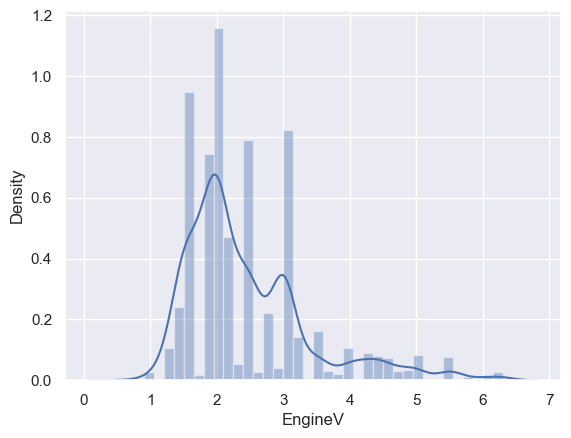

In [42]:
data_3 = data_2[data_2["EngineV"] < 6.5]
sns.distplot(data_3["EngineV"])

/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_89231/2525852583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

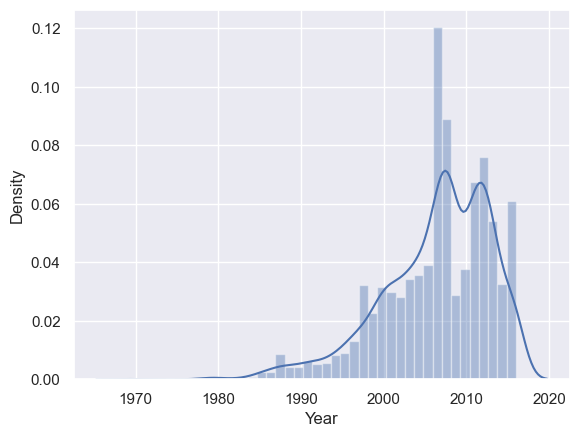

In [43]:
sns.distplot(data_3["Year"])

小さい値に外れ値が多い、なぜならほとんどは長く使われず、ヴィンテージカーとして使われるから

In [44]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"] > q]

/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_89231/2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

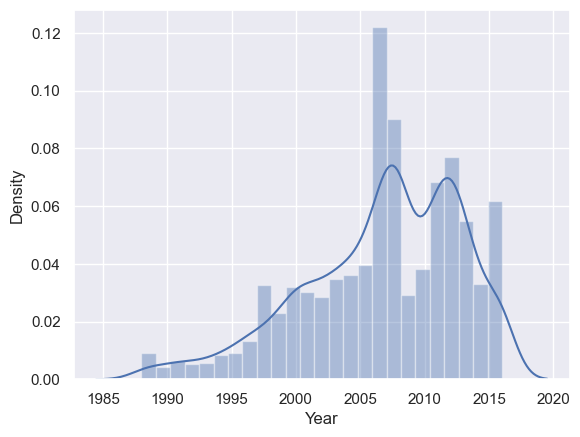

In [47]:
sns.distplot(data_4["Year"])

削除後のデータにインデックスを振る

In [48]:
data_cleaned = data_4.reset_index(drop=True)

In [49]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


最小二乗法を使って回帰分析を行う

線形性を確認する

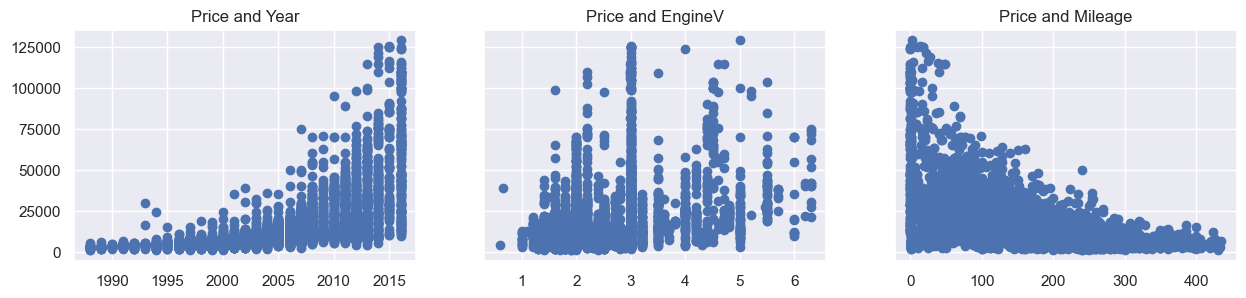

In [50]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title("Price and Mileage")

plt.show()

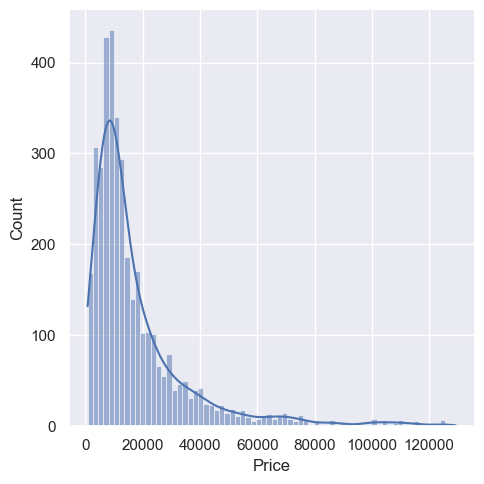

In [51]:
sns.displot(data_cleaned["Price"], kde=True)

指数分布であることを確認できたら、対数変換を行う

In [52]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


対数変換したグラフを表示

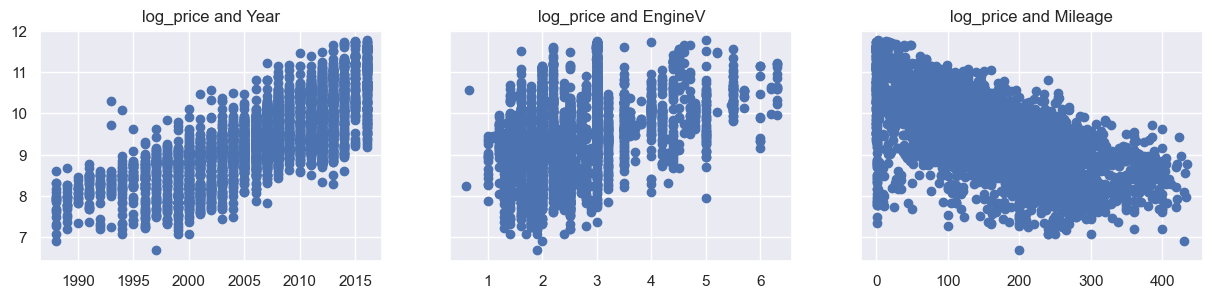

In [53]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned["Year"], data_cleaned["log_price"])
ax1.set_title("log_price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
ax2.set_title("log_price and EngineV")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["log_price"])
ax3.set_title("log_price and Mileage")

plt.show()

# ある程度線形になったのでOK

対数変換前の車の価格は削除

In [ ]:
data_cleaned = data_cleaned.drop(["Price"], axis=1)

### 内生性の確認 (残差の値が独立変数と影響しあっていないか確認)

### 正規性と同分散性

### 共分散性

### 自己相関(時系列データではないための今回はOK)

### 多重共線性の確認
- statsmodelsのVIFを使う

In [54]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

'Mileage', 'Year', 'EngineV'の関係を見る

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[["Mileage", "Year", "EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [
    variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])
]
vif["features"] = variables.columns

- VIF = 1: 多重共線性はない
- 1 < VIF < 5: 多重共線性は問題ない
- 5 < VIF: 多重共線性がある

In [56]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


造年が他の変数と強く相関していることがわかるため、削除する

In [57]:
data_no_multicollinearity = data_cleaned.drop(["Year"], axis=1)

ダミー変数を作成する

In [58]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [59]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.0,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.0,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.0,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.0,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### 回帰分析

変数の順番を並び替える

In [60]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [61]:
cols = [
    "log_price",
    "Mileage",
    "EngineV",
    "log_price",
    "Brand_BMW",
    "Brand_Mercedes-Benz",
    "Brand_Mitsubishi",
    "Brand_Renault",
    "Brand_Toyota",
    "Brand_Volkswagen",
    "Body_hatch",
    "Body_other",
    "Body_sedan",
    "Body_vagon",
    "Body_van",
    "Engine Type_Gas",
    "Engine Type_Other",
    "Engine Type_Petrol",
    "Registration_yes",
]